In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


In [2]:
A = pd.array([1, 4, 5, 12])

In [3]:
print(A)

<IntegerArray>
[1, 4, 5, 12]
Length: 4, dtype: Int64


In [4]:
print(A.shape)

(4,)


### Model build 


In [5]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

## Print Dependencies



Dependences are fundamental to record the computational environment.

In [6]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-38-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Jan 18 2021 18:28:01CET



In [68]:
from process import load_generate_data
regr_data, class_data = load_generate_data(1, 10)

In [69]:
class_data.shape

(1378, 11)

In [70]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:]

In [71]:
y.shape

(1378,)

In [72]:
x.shape

(1378, 10)

In [73]:
x_train = x[:500]
x_val = x[500:]

y_train = y[:500]
y_val = y[500:]

In [74]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [75]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (8 , activation = "relu" , input_shape = (1378, 10)))
    model.add (layers.Dense (8, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

model = build_model ()
history = model.fit ( x_train, y_train, epochs = 50, batch_size = 5 , validation_data = (x_val, y_val) )
model.save("prova.h5")

Epoch 1/50
100/100 [==============================] - 1s 4ms/step - loss: 0.8728 - accuracy: 0.5217 - val_loss: 0.7315 - val_accuracy: 0.4784
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5603 - val_loss: 0.6978 - val_accuracy: 0.4989
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5056 - val_loss: 0.6985 - val_accuracy: 0.4897
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4886 - val_loss: 0.6986 - val_accuracy: 0.4818
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5246 - val_loss: 0.6979 - val_accuracy: 0.4806
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5072 - val_loss: 0.6964 - val_accuracy: 0.4863
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5547 - val_loss: 0.6952 - val_accuracy: 0.4829
Epoch 

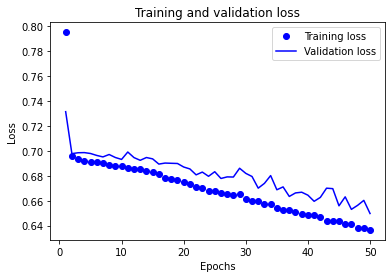

In [76]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



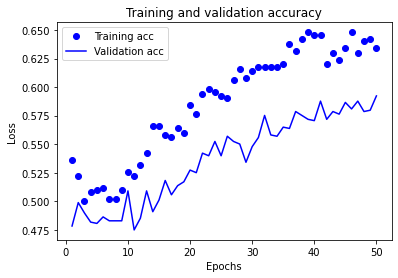

In [77]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()